# Part I - Ford GoBike System Data
## by Waad AlDoaij
## Introduction

This data set which contains details about each trip taken in a bike-sharing program serving the greater San Francisco Bay area, will be used in this study,
these dataframe following columns are:

(duration_sec, start_time, starting_Day, end_time, ending_Day, start_station_id, start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name,end_station_latitude, end_station_longitude, bike_id, user_type,member_birth_year, member_gender, bike_share_for_all_trip,Hours)


In order to better understand the data, I thought about the provided questions before I began the analysis process.
- When in terms of the time of day and day of the week, are most trips taken?
- How long does an average trip ?
- Does it matter whether a user is a subscriber or a customer?

The step journey in this project began with importing all of the packages, then uploading the dataset, and then beginning wrangling. After that, I made some observations and began cleaning up the issues that I faced, and finally, I began to visualize all of the charts.

In [3]:
# Import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Uploading the Dataset

In [4]:
Bike_df = pd.read_csv('Fordgobike-tripdata.csv')

Bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Preliminary Wrangling

In [5]:
Bike_df.shape

(183412, 16)

In [6]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
#checking for null values
Bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
Bike_df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
Bike_df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
Bike_df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### What is the structure of your dataset?

>The dataset has 183412 rows with the following 16 columns (duration sec, start time, end time, start station id, start station name, start station latitude, end station longitude, bike id, user type, member birth year, member gender, and bike share for all trip)

### What is/are the main feature(s) of interest in your dataset?

>I'm especially curious to know whether males or women are the more common gender riders,
also if there is a difference in user type, whether subscriber or customer..

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>- member_gender 
>- user_type

 ## Observation Summary:

`Quality issues :`
- Some missing values 
- wrong datatype for both (start_time,end_time)

## Cleaning 

In [11]:
#Makeing copy of the dataframe

Bike_df_clean = Bike_df.copy()

In [12]:
#Coverting the datatype to datetime

Bike_df_clean ['end_time']= pd.to_datetime(Bike_df_clean['end_time'])
Bike_df_clean ['start_time']= pd.to_datetime(Bike_df_clean['start_time'])

#Test
Bike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [13]:
#Drop the missing values
Bike_df_clean = Bike_df_clean.dropna()
#Test
Bike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [14]:
#Coverting the datatype to int
Bike_df_clean['member_birth_year'] = Bike_df_clean['member_birth_year'].astype('int')
#Test
Bike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(6), int64(3), object(5)
memory usag

In [15]:
#Creating new two column for returning the end and start day from the start_time.
Bike_df_clean.insert(2,'starting_Day',Bike_df_clean['start_time'].dt.day_name())

Bike_df_clean.insert(4,'Ending_Day',Bike_df_clean['end_time'].dt.day_name())

In [16]:
#Creating new column for returning hours
Bike_df_clean['Hours'] = Bike_df_clean['start_time'].dt.hour

In [17]:
#Test
Bike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
starting_Day               174952 non-null object
end_time                   174952 non-null datetime64[ns]
Ending_Day                 174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_t

**Functions**

In [18]:
#Returning the ages 
ages = 2019 - Bike_df_clean.member_birth_year

In [19]:
#Craeting function for chart labals
def functionN(x,y,title):
     plt.xlabel(x , fontsize=14)
     plt.ylabel(y , fontsize=14)
     plt.title(title,fontsize=18)

In [20]:
#Craeting function for chart size
def figz(x , y):
    plt.figure(figsize=(x,y))

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [21]:
Bike_df_clean.shape

(174952, 19)

In [22]:
Bike_df_clean.columns

Index(['duration_sec', 'start_time', 'starting_Day', 'end_time', 'Ending_Day',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'Hours'],
      dtype='object')

In [23]:
Bike_df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,Hours
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,13.456165
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,4.734282
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,17.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000


In [24]:
Bike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
starting_Day               174952 non-null object
end_time                   174952 non-null datetime64[ns]
Ending_Day                 174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_t

`What is the average duration of the trips?`

In [25]:
Bike_df_clean.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

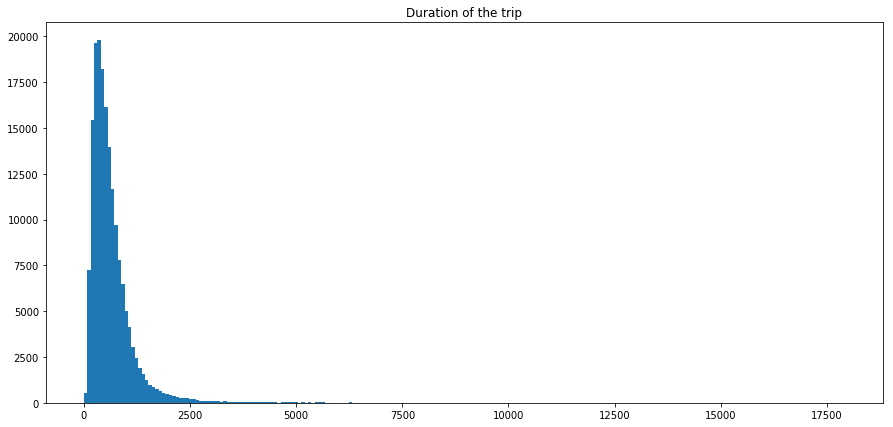

In [26]:
figz(15,7)
b = np.arange(0, 18000 , 80)

plt.hist(data= Bike_df_clean, x='duration_sec', bins=b)
plt.title('Duration of the trip');

the avrage show to be 704s which is 11m,
the max is 84548 lead to be 1409m around 23h,
min 61s about 1m, 


the chart display the distribuation shown to be right-skewed.

` what is the common gender riders ?`

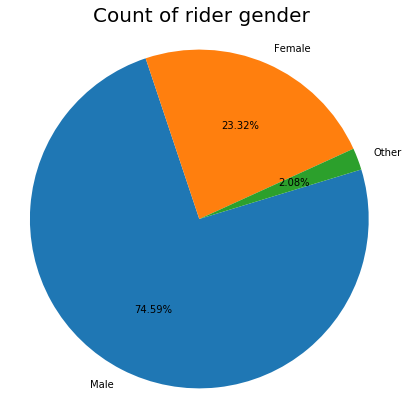

In [27]:
figz(19,7)
member_count = Bike_df_clean['member_gender'].value_counts()

plt.pie(member_count  , labels = member_count.index ,startangle = 17, counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Count of rider gender', fontsize= 20);

The above chart shows that male have the higest score of all riders with 74.59%.

`What is the most common started day ?`

In [28]:
Bike_df_clean.starting_Day.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: starting_Day, dtype: int64

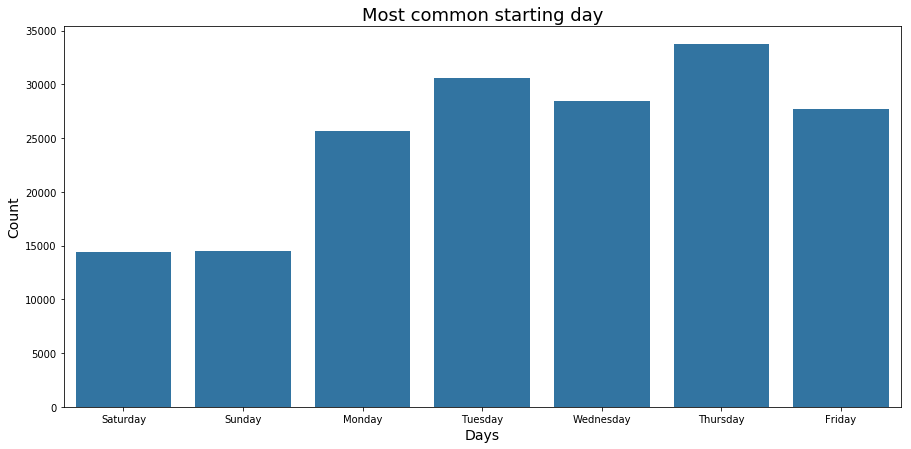

In [29]:
figz(15,7)
days = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday']
blue = sb.color_palette()[0]

sb.countplot(data=Bike_df_clean, x='starting_Day', order=days , color = blue);

functionN('Days', 'Count','Most common starting day')

As shown it end to be the most common starting day was Thursday and Tuesday where sunday and saturday was the lowest.

`Who is the most recent user customer or subscriber ?`

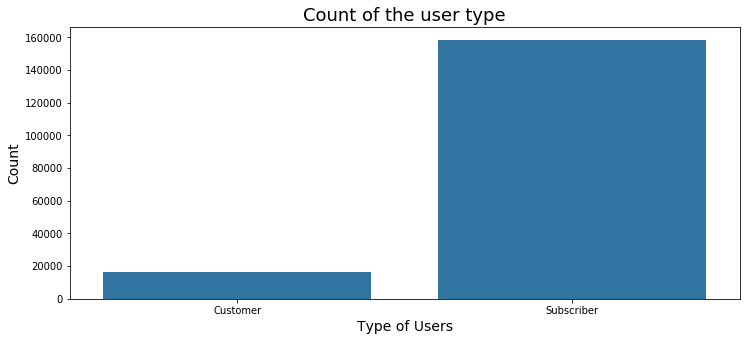

In [30]:
figz(12,5)
sb.countplot(data=Bike_df_clean, x ='user_type', color=blue)
functionN('Type of Users', 'Count','Count of the user type')

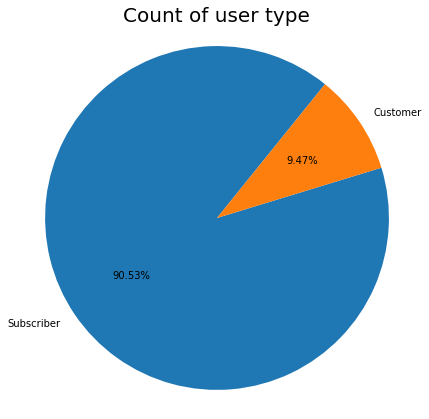

In [31]:
figz(15,7)
count_user = Bike_df_clean['user_type'].value_counts()

plt.pie(count_user , labels = count_user.index ,startangle = 17, counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Count of user type', fontsize= 20);

This cahrta displays that most customer were subscriber with about 90%.

`Do bike share for all trip?`

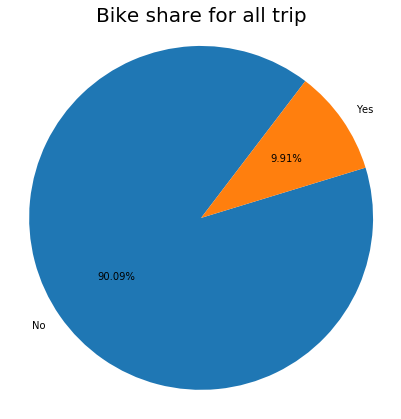

In [32]:
figz(15,7)
a = Bike_df_clean['bike_share_for_all_trip'].value_counts()

plt.pie(a , labels = a.index ,startangle = 17, counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike share for all trip', fontsize= 20);

It shows that 90.09% which means the majorty of the users doesnt share.

`What is the most common ending day ?`

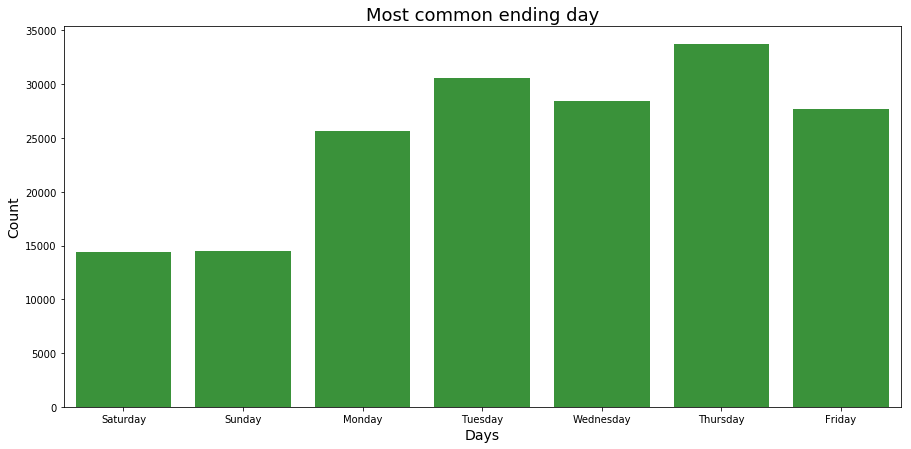

In [33]:
figz(15,7)
Green= sb.color_palette()[2]

sb.countplot(data=Bike_df_clean, x='Ending_Day', order=days , color = Green);

functionN('Days', 'Count','Most common ending day')

As shown it lead to be that Thursday is the most day to be ended.

`Highest use per hour?`

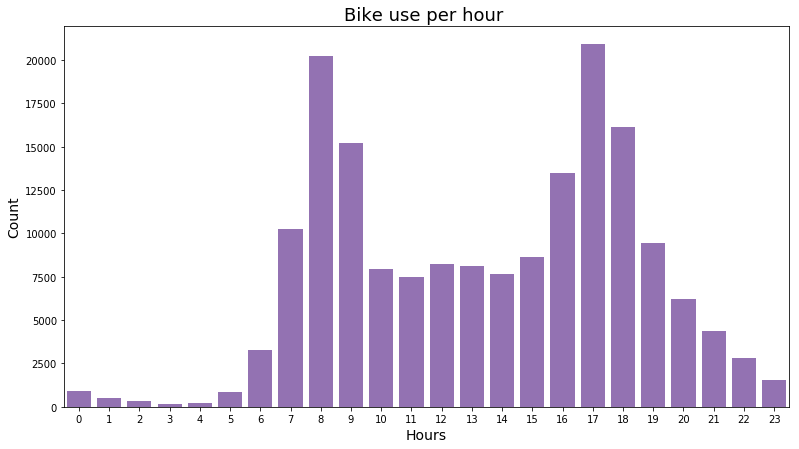

In [34]:
figz(13,7)
p = sb.color_palette()[4]
sb.countplot(data = Bike_df_clean, x = 'Hours', color = p )

functionN('Hours', 'Count','Bike use per hour ')

The up chart indicates that there will be an increase in use between 7 and 9 in the morning and 4 to 6 in the evening.
I believe it is because of their daily journey to go and back from work .

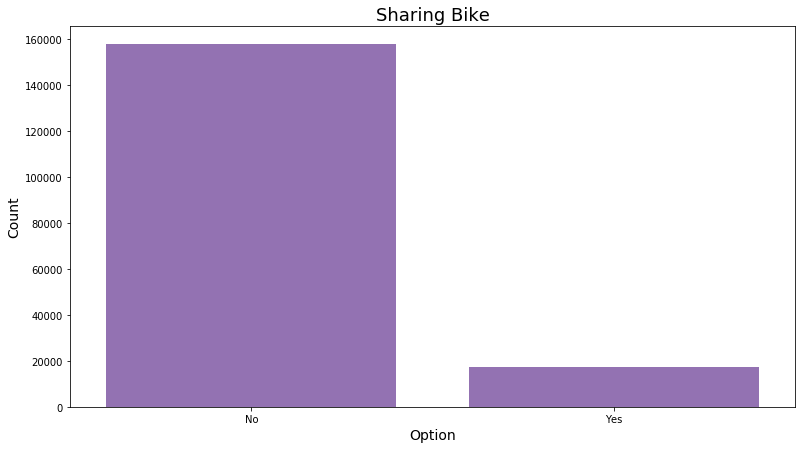

In [35]:
figz(13,7)
sb.countplot(data = Bike_df_clean, x = 'bike_share_for_all_trip', color = p);

functionN('Option', 'Count','Sharing Bike')

Most of them didnt share it.

`What is the avrage age of the users ? `

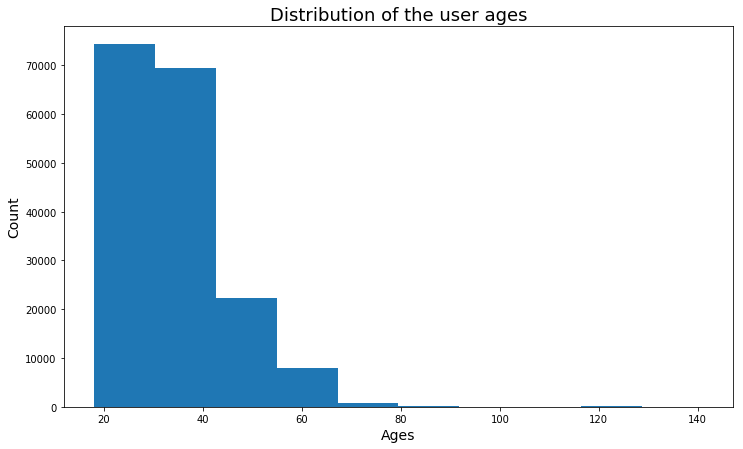

In [36]:
figz(12,7)
plt.hist(ages)

functionN('Ages', 'Count','Distribution of the user ages')

The avrage user age end to be between 20-40.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

No, there wasn't,

Yes, I did some changes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was not significant problem and issue I faced just a small quality issue such as the data type and also a few missing value, i’ve change the type for starting\ending time because it would make more sense to be datetime more then object So I change it to give it a proper datatype also for the date of birth I change to to Int ,and for the missing value I decide to drop it to make the data more cleaner lastly,
I create few columns so I can return the starting/ending day  and the hour per use
also I creat new object (ages) so I can return the actuel age from the year,
lastley I created some function so it would help me insted of having duplicate code.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

`Starting Day based on the user ( customer , subscriber )`

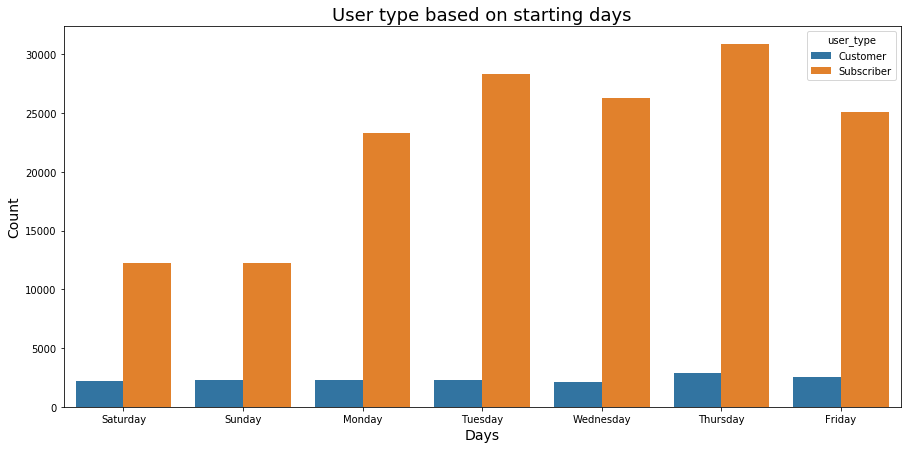

In [37]:
figz(15,7)

a = sb.countplot(data=Bike_df_clean, x='starting_Day',order=days, hue='user_type')

functionN('Days', 'Count','User type based on starting days')

`Ending Day based on the user ( customer , subscriber )`

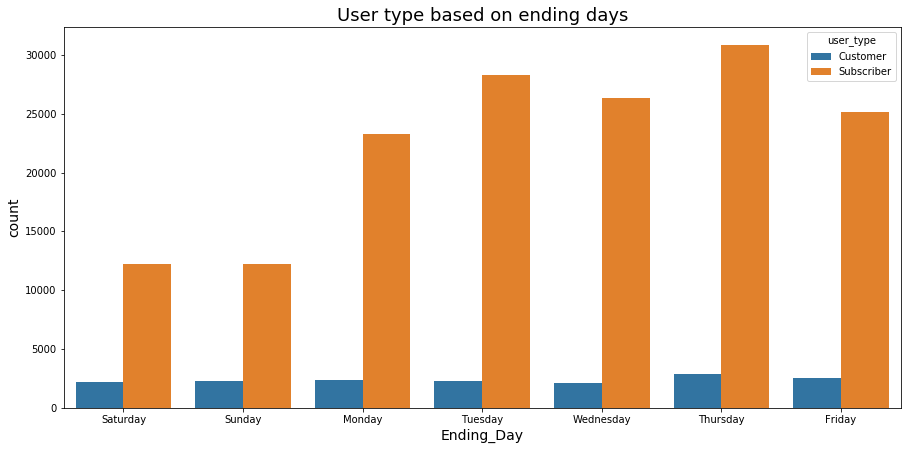

In [44]:
figz(15,7)
functionN('Days', 'Count','User type based on ending days')

b = sb.countplot(data=Bike_df_clean, x='Ending_Day',order=days, hue='user_type')

What I see after viewing these two charts is that, in opposition to the weekend, weekday usage is high and increasing for both subscribers and customers.

`What the most common user type based on genders`

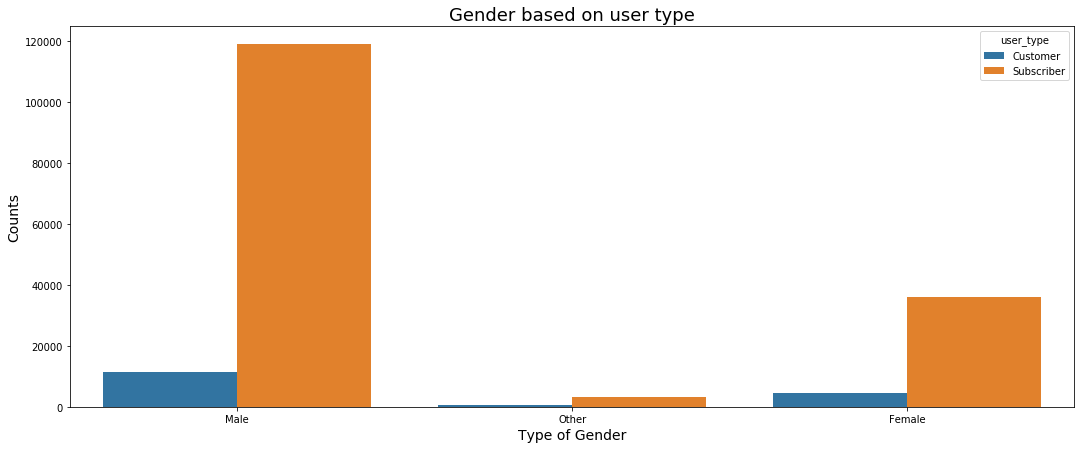

In [39]:
figz(18,7)
sb.countplot(data=Bike_df_clean , x='member_gender' ,hue='user_type' )
functionN('Type of Gender', 'Counts','Gender based on user type')

as it reveals that all genders are highly found to be a subscribers.

`Genders based on age`

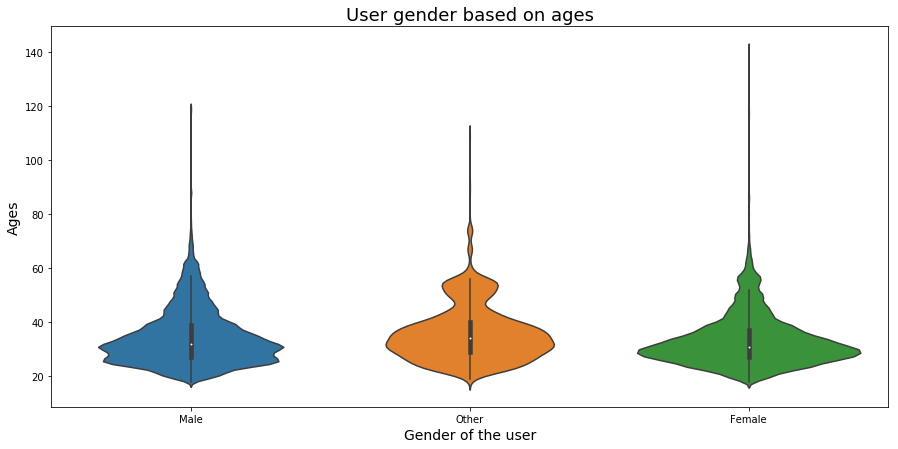

In [40]:
figz(15,7)

sb.violinplot(data=Bike_df_clean,x='member_gender',y= ages )

functionN('Gender of the user', 'Ages','User gender based on ages')

All genders are increasing, mainly between the ages of 20 and 40.

`Sharing trip based on gender`

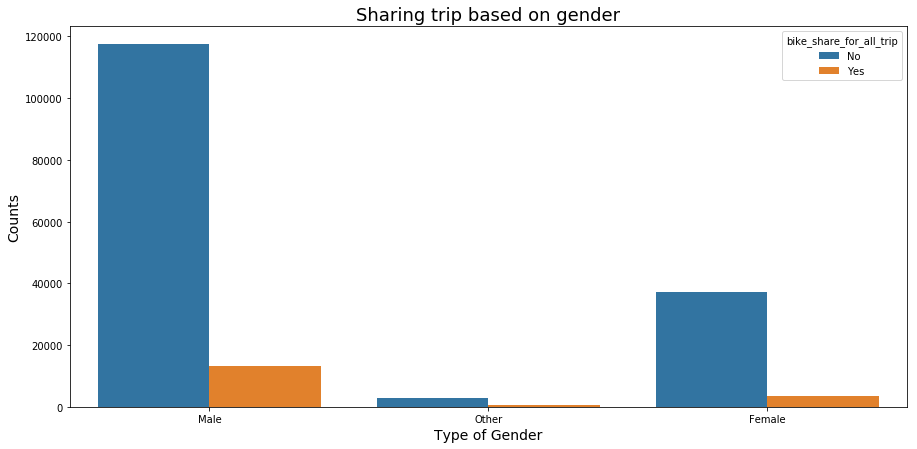

In [41]:
figz(15,7)
sb.countplot(data=Bike_df_clean , x='member_gender' ,hue='bike_share_for_all_trip' )

functionN('Type of Gender', 'Counts','Sharing trip based on gender')

As shown it looks like mostly pepole dont share their trip.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

All users appear to use bikes more frequently during the weekdays than during the weekends, and depending on user type, I observe a significant gender gap between male users and the female users most of the users were males also the user mostly dont share their trip.
Finally, I would like to discuss the distribution of ages. All genders seem to be between the ages of 20 and 40.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
1. Weekend usage is lower than weekday usage.
2. Male users of bikes often use them more frequently than female users.
3. 20~40 people ride bikes the most.
4. Most users do not share their trip.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

`Gender and user type per duration`

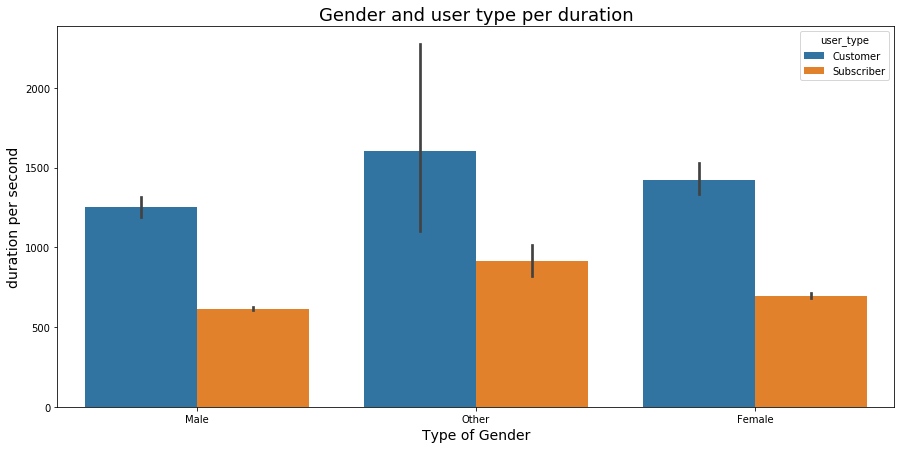

In [42]:
figz(15,7)

sb.barplot(data= Bike_df_clean , x='member_gender', y='duration_sec' ,hue='user_type')
functionN('Type of Gender', 'duration per second','Gender and user type per duration')

it shows that customers have long trip in all gender type (male-female-other) where subscriber end to have shorter time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>All customers' durations are increasing, and I observe a decrease in users and a short time spent by subscribers.
### Were there any interesting or surprising interactions between features?

>No.

## Conclusions
>Following the wrangling and cleaning of the data for this extensive visualization project about the Ford GoBike System, I was able to better comprehend the data and recognize each column and each thing that was related to it. I also came to some conclusions following the visualization and exploration.
I discovered that men make up the majority of users, whether they are customers or subscribers, and that the 
Subscriber client was higher than the customer client.
The majority of people who use bikes are between the ages of 20 and 40, and they are likely to dislike sharing them. I also learned that the most frequent starting and ending times are usually on weekdays rather than weekends, from seven in the morning until nine in the morning, and from four in the evening until six in the evening.   I might say that there are some issues that I need to fix on and  such as some erroneous data types and some  missing values.
  This project was excellent for using visualization to analyze the data.

In [43]:
Bike_df_clean.to_csv('Bike_df_clean.csv', index=None)
df = pd.read_csv('Bike_df_clean.csv')

#Test
df

,duration_sec,start_time,starting_Day,end_time,Ending_Day,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Hours
0,52185,2019-02-28 17:32:10.145,Thursday,2019-03-01 08:01:55.975,Friday,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,17
1,61854,2019-02-28 12:13:13.218,Thursday,2019-03-01 05:24:08.146,Friday,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,12
2,36490,2019-02-28 17:54:26.010,Thursday,2019-03-01 04:02:36.842,Friday,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,17
3,1585,2019-02-28 23:54:18.549,Thursday,2019-03-01 00:20:44.074,Friday,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,23
4,1793,2019-02-28 23:49:58.632,Thursday,2019-03-01 00:19:51.760,Friday,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,23
5,1147,2019-02-28 23:55:35.104,Thursday,2019-03-01 00:14:42.588,Friday,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,23
6,1615,2019-02-28 23:41:06.766,Thursday,2019-03-01 00:08:02.756,Friday,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,23
7,1570,2019-02-28 23:41:48.790,Thursday,2019-03-01 00:07:59.715,Friday,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,23
8,1049,2019-02-28 23:49:47.699,Thursday,2019-03-01 00:07:17.025,Friday,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,23
9,458,2019-02-28 23:57:57.211,Thursday,2019-03-01 00:05:35.435,Friday,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,23
